In [1]:
    
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif
from sklearn.model_selection import train_test_split,  GroupShuffleSplit
import pathlib
from datetime import datetime
import os

In [ ]:
!pwd

In [ ]:
!cp -r /data/shpx/notebooks/ozinman/seller_reco/offline_metrics_based_prepped_data/simpylex /data/shpx/notebooks/olivyatan/Unbiasing

#### Data of piyi v7 multilabel unbiased run: 

In [ ]:
import pickle
import numpy as np
import pandas as pd
# link od model run: https://github.ebay.com/olivyatan/treeplex/tree/krylov_week07_20230213180248_Monday/htmls/piyi_v7_unbiased 
file = open(f'/data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data', 'rb')
# dump information to that file
prepped_data = pickle.load(file)
file.close()

In [7]:
!ls  /data/shpx/data/olivyatan/
# to see model run": week07_20230213180248_Monday 

017aa70d-e359-4413-b138-d8bf228aea84
021edcc5-98df-4f73-92a0-fec53111e359
044b771e-2cee-4112-a84c-6674543ac414
08233130-24fc-4d37-be6c-109374e63d29
103649f2-46ec-4481-a89b-e3c5b1609f0b
1f210db8-b539-4c44-8d51-963b0fdbbe18
322b6b6c-bd20-42a6-bf07-6d91d1581ed3
32b97b73-6d76-4454-a3eb-56b98ebfab9f
33700781-3ce8-42d4-8ffc-90c3d555e2c4
3bf79e1b-d94b-4d25-9376-fb22efc5e4a9
40014b10-1b2d-4517-b588-f3974c4c339b
4b6c9352-0dbb-4573-9109-b0f5a76e6a31
4fd657ce-7e9d-4bce-b788-d908ae144313
5539f3e8-0cd1-41ad-8fcd-1a85952a4c3b
5553d758-5178-4d73-8001-78f99cb37daa
579c649e-6b8b-4ab9-8f92-196d42f87027
5e63a5b1-5448-453f-8997-342189e5ad80
6372ef2c-b1f1-4dae-b471-a264c1c98f49
6407e2f5-c026-49eb-9d30-38a684a77a13
65fb67b3-776e-4098-8fff-63e487b86211
72a20269-2f91-49f4-86c7-3db083b6874c
73405b2a-fe93-4329-a6ea-4a5e553d3b79
73f0a6b6-c566-49bf-9c83-518b8adc40db
8046d92e-d154-43f3-8538-b4db023de409
81b53937-e0f7-4a7f-af32-0ede581c8be2
87064c5e-1090-4825-be56-21a869df0f32
8d860dc4-b404-4950-a2f0-4ba28ca44106
9

In [5]:
!ls  /data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data
#location of the rin itself

/data/shpx/data/olivyatan/week07_20230213180248_Monday/prep/piyi_v7_unbiased_prepped_data


In [6]:
!ls  /data/shpx/data/olivyatan//week07_20230213180248_Monday/simplex_models/

calibration_params.json
simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl
simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl_parameters.log


In [1]:
!ls  /data/shpx/data/olivyatan//week07_20230213180248_Monday/simplex_models/simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl

/data/shpx/data/olivyatan//week07_20230213180248_Monday/simplex_models/simplex_piyi_v7_unbiased_week07_20230213165511_Monday.pkl


#### Data of piyi v7 biased:

In [10]:
!ls  /data/shpx/data/olivyatan/week07_20230213175714_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl

/data/shpx/data/olivyatan/week07_20230213175714_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl


In [8]:
!ls  /data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data

/data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data


In [ ]:
rsync -avzh --progress kry45:/data/shpx/data/olivyatan/week07_20230213180248_Monday/simplex_models/simplex_piyi_v7_week07_20230213163652_Monday.pkl .


In [3]:
import pickle
import numpy as np

import pandas as pd
# link of piyi v7 multilabel model run: https://github.ebay.com/olivyatan/treeplex/tree/krylov_week07_20230213175714_Monday/htmls/piyi_v7
file = open(f'/data/shpx/data/olivyatan/week07_20230213175714_Monday/prep/piyi_v7_prepped_data', 'rb')
# dump information to that file
prepped_data_v7 = pickle.load(file)
file.close()

In [4]:
pdf_v7 = pd.DataFrame(prepped_data_v7.hold_out)

In [35]:
pdf_v7['meid'].equals(pdf['meid'])

False

In [36]:
set(pdf_v7['meid'].tolist()) == set(pdf['meid'].tolist())

True

In [37]:
set(pdf_v7['itemId'].tolist()) == set(pdf['itemId'].tolist())

True

In [38]:
set(pdf_v7['label'].tolist()) == set(pdf['label'].tolist())

True

In [39]:
pdf_v7['label'].tolist() == pdf['label'].tolist()

False

In [8]:
prepped_data

In [3]:
np.unique(prepped_data.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1665778,  242473,   14370,    2290,     354,     124,    2224]))

In [5]:
len(prepped_data.y_test)

1927613

In [4]:
prepped_data.X_test.shape

(1927613, 33)

In [10]:
dir(prepped_data)

['X_test',
 'X_test_for_calibration',
 'X_test_sample_weight',
 'X_test_sample_weight_eval',
 'X_train',
 'X_train_sample_weight',
 'X_train_sample_weight_eval',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apply_column_filters',
 'apply_data_filters',
 'apply_filters',
 'compute_event_rate',
 'compute_multi_label_event_rate',
 'construct_label_array',
 'event_rate',
 'extract_schema',
 'extract_weights',
 'filter_examples',
 'force_contiguous',
 'get_eval_weights',
 'get_event_rates',
 'get_label_column',
 'group_hold_out',
 'group_train',
 'hold_out',
 'mem_usage',
 'raw_event_rate',
 'sample_data',
 'schema',
 'set_click_propensities',
 'set_up_logger',
 'split_

In [6]:
prepped_data.mem_usage

5850216184

In [7]:
prepped_data.X_test_sample_weight

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [8]:
np.unique(prepped_data.X_test_sample_weight)

array([ 0.420534  ,  0.5568509 ,  0.63525075,  0.63771963,  0.6405908 ,
        0.6932791 ,  0.7818593 ,  0.82777905,  0.87078625,  0.88848084,
        0.9129124 ,  0.9153468 ,  0.933552  ,  0.9442985 ,  0.9458925 ,
        0.94967794,  0.9522477 ,  0.9545896 ,  0.955105  ,  0.9586939 ,
        0.95942634,  0.9636964 ,  0.96699977,  0.9703532 ,  0.9775687 ,
        0.97761095,  0.9984952 ,  1.        ,  1.0170945 ,  1.0385801 ,
        1.0407873 ,  1.0512642 ,  1.0711716 ,  1.0857247 ,  1.0946076 ,
        1.1048454 ,  1.1054703 ,  1.1068069 ,  1.1071949 ,  1.113889  ,
        1.1227758 ,  1.1443181 ,  1.15719   ,  1.1657927 ,  1.1696985 ,
        1.1827197 ,  1.1941738 ,  1.222866  ,  1.3013855 ,  1.4192955 ,
        1.4381298 ,  1.5118873 ,  1.5607082 ,  1.5731978 ,  1.5907905 ,
        1.7094122 ,  1.7464522 ,  1.7751218 ,  1.8270276 ,  1.8280367 ,
        1.8292229 ,  1.9262638 ,  1.9875515 ,  2.0004961 ,  2.021212  ,
        2.040895  ,  2.0515463 ,  2.0699894 ,  2.073404  ,  2.11

In [9]:
prepped_data.X_test.shape

(1927613, 33)

In [10]:
prepped_data.hold_out

{'meid': array([b'06c811dbcf3f4e8492ec13ad4943baa8',
        b'06c811dbcf3f4e8492ec13ad4943baa8',
        b'06c811dbcf3f4e8492ec13ad4943baa8', ...,
        b'f0b3de2164314e59b20a2bc411c7b5f1',
        b'f0b3de2164314e59b20a2bc411c7b5f1',
        b'f0b3de2164314e59b20a2bc411c7b5f1'], dtype='|S32'),
 'mlrRank': array([ 1,  2,  3, ...,  8,  9, 10], dtype=int32),
 'itemId': array([165886259355, 304758681643, 255926583975, ..., 195554593605,
        354406443251, 385322386560]),
 'labels.labelClassicBBE': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32)}

In [5]:
pdf = pd.DataFrame(prepped_data.hold_out)

In [7]:
pdf.shape,pdf_v7.shape

((1927613, 4), (1927613, 4))

In [9]:
pdf.head(3)

,meid,mlrRank,itemId,labels.labelClassicBBE
0,b'06c811dbcf3f4e8492ec13ad4943baa8',1,165886259355,-1
1,b'06c811dbcf3f4e8492ec13ad4943baa8',2,304758681643,-1
2,b'06c811dbcf3f4e8492ec13ad4943baa8',3,255926583975,-1


In [15]:
prepped_data.hold_out['meid'][:10]

array([b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8',
       b'06c811dbcf3f4e8492ec13ad4943baa8'], dtype='|S32')

In [16]:
prepped_data.hold_out['itemId']

array([165886259355, 304758681643, 255926583975, ..., 195554593605,
       354406443251, 385322386560])

In [ ]:
#mlrRank is original production model rank: 

In [17]:
prepped_data.hold_out['mlrRank'][:40]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
        6,  7,  8,  9, 10,  1], dtype=int32)

### Load piyi v7 model

In [12]:
import xgboost
piyiv7_bias_model = xgboost.Booster()

In [13]:
piyiv7_bias_model.load_model('model_piyi_v7.bst')

[17:43:51] WARNING: ../src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [14]:
y_pred_v7 = piyiv7_bias_model.predict(xgboost.DMatrix(prepped_data_v7.X_test))

In [15]:
y_pred_v7

array([ 1.168902 ,  0.4626613, -0.6359106, ..., -2.253786 , -2.428617 ,
       -2.5951557], dtype=float32)

In [16]:
pdf_v7['y_pred_v7']=y_pred_v7

In [17]:
pdf_v7['label'] = prepped_data_v7.y_test

In [18]:
pdf_v7['rank_v7'] = pdf_v7.groupby('meid')['y_pred_v7'].rank(method='dense', ascending=False)

In [40]:
pdf_v7.sort_values(by=['meid','mlrRank'],inplace=True)

In [ ]:
pdf.sort_values(by=['meid','mlrRank'],inplace=True)

In [48]:
pdf.head(10)

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
194818,b'0000265fbd7a44aca48a906adeff8875',1,134404248997,-1,-0.483707,0,1.0,1.0,1.0
194819,b'0000265fbd7a44aca48a906adeff8875',2,144875276572,-1,-0.992528,0,5.0,1.0,1.0
194820,b'0000265fbd7a44aca48a906adeff8875',3,234653614858,-1,-0.812157,1,3.0,1.0,1.0
194821,b'0000265fbd7a44aca48a906adeff8875',4,255793472038,-1,-0.780089,0,2.0,1.0,1.0
194822,b'0000265fbd7a44aca48a906adeff8875',5,404029139250,-1,-1.391939,0,7.0,1.0,1.0
194823,b'0000265fbd7a44aca48a906adeff8875',6,175568244289,-1,-1.158522,0,6.0,1.0,1.0
194824,b'0000265fbd7a44aca48a906adeff8875',7,394293977076,-1,-0.905359,0,4.0,1.0,1.0
194825,b'0000265fbd7a44aca48a906adeff8875',8,295251065804,-1,-1.878634,0,10.0,1.0,1.0
194826,b'0000265fbd7a44aca48a906adeff8875',9,265991957603,-1,-1.501192,0,8.0,1.0,1.0
194827,b'0000265fbd7a44aca48a906adeff8875',10,234776254554,-1,-1.798797,1,9.0,1.0,1.0


In [47]:
pdf_v7.head(10)

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred_v7,label,rank_v7
1263984,b'0000265fbd7a44aca48a906adeff8875',1,134404248997,-1,-0.412333,0,1.0
1263985,b'0000265fbd7a44aca48a906adeff8875',2,144875276572,-1,-1.093016,0,3.0
1263986,b'0000265fbd7a44aca48a906adeff8875',3,234653614858,-1,-1.134505,1,4.0
1263987,b'0000265fbd7a44aca48a906adeff8875',4,255793472038,-1,-1.141674,0,5.0
1263988,b'0000265fbd7a44aca48a906adeff8875',5,404029139250,-1,-1.825263,0,9.0
1263989,b'0000265fbd7a44aca48a906adeff8875',6,175568244289,-1,-1.467183,0,6.0
1263990,b'0000265fbd7a44aca48a906adeff8875',7,394293977076,-1,-0.876004,0,2.0
1263991,b'0000265fbd7a44aca48a906adeff8875',8,295251065804,-1,-2.111445,0,10.0
1263992,b'0000265fbd7a44aca48a906adeff8875',9,265991957603,-1,-1.567383,0,7.0
1263993,b'0000265fbd7a44aca48a906adeff8875',10,234776254554,-1,-1.740605,1,8.0


In [20]:
pdf_v7[pdf_v7['label']==6].rank_v7.mean()

2.3965827338129495

In [43]:
pdf[pdf['label']==6].rank_unbiased.mean()

2.414118705035971

### combine piyi v7 and unbiased piyi_v7

In [49]:
pdf_both = pd.merge(pdf, pdf_v7, how="inner", on=["meid", "itemId"])

In [50]:
pdf_both.shape

(1927613, 14)

In [51]:
pdf_both['mlrRank_x']==pdf_both['mlrRank_y']

0          True
1          True
2          True
3          True
4          True
           ... 
1927608    True
1927609    True
1927610    True
1927611    True
1927612    True
Length: 1927613, dtype: bool

In [52]:
pdf_both.drop(['labels.labelClassicBBE_x', 'labels.labelClassicBBE_y','X_test_sample_weight','X_test_sample_weight_eval'], axis=1,inplace=True)

In [53]:
pdf_both.head(10)

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7
0,b'0000265fbd7a44aca48a906adeff8875',1,134404248997,-0.483707,0,1.0,1,-0.412333,0,1.0
1,b'0000265fbd7a44aca48a906adeff8875',2,144875276572,-0.992528,0,5.0,2,-1.093016,0,3.0
2,b'0000265fbd7a44aca48a906adeff8875',3,234653614858,-0.812157,1,3.0,3,-1.134505,1,4.0
3,b'0000265fbd7a44aca48a906adeff8875',4,255793472038,-0.780089,0,2.0,4,-1.141674,0,5.0
4,b'0000265fbd7a44aca48a906adeff8875',5,404029139250,-1.391939,0,7.0,5,-1.825263,0,9.0
5,b'0000265fbd7a44aca48a906adeff8875',6,175568244289,-1.158522,0,6.0,6,-1.467183,0,6.0
6,b'0000265fbd7a44aca48a906adeff8875',7,394293977076,-0.905359,0,4.0,7,-0.876004,0,2.0
7,b'0000265fbd7a44aca48a906adeff8875',8,295251065804,-1.878634,0,10.0,8,-2.111445,0,10.0
8,b'0000265fbd7a44aca48a906adeff8875',9,265991957603,-1.501192,0,8.0,9,-1.567383,0,7.0
9,b'0000265fbd7a44aca48a906adeff8875',10,234776254554,-1.798797,1,9.0,10,-1.740605,1,8.0


### Unbiased ranking- load model:

In [21]:
import xgboost

In [22]:
xgb_model_loaded = xgboost.Booster()
xgb_model_loaded.load_model('simplex_piyi_v7_unbiased.bst')

[17:49:03] WARNING: ../src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [23]:
xgb_model_loaded

In [24]:
y_pred = xgb_model_loaded.predict(xgboost.DMatrix(prepped_data.X_test))

In [25]:
y_pred

array([ 0.58596784, -0.14937016,  0.36867687, ..., -1.1259544 ,
       -0.6990923 , -1.2575393 ], dtype=float32)

In [26]:
prepped_data.y_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [27]:
np.unique(prepped_data.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([1665778,  242473,   14370,    2290,     354,     124,    2224]))

In [28]:
pdf['y_pred'] = y_pred

In [29]:
pdf['label'] = prepped_data.y_test

In [30]:
pdf['rank_unbiased'] = pdf.groupby('meid')['y_pred'].rank(method='dense', ascending=False)

In [31]:
pdf['X_test_sample_weight'] =prepped_data.X_test_sample_weight

In [32]:
pdf['X_test_sample_weight_eval'] =prepped_data.X_test_sample_weight_eval

In [33]:
pdf_v7.head()

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred_v7,label,rank_v7
0,b'0cec9e13a1c141b08aeb4ca7d5596a14',1,115678469197,-1,1.168902,1,1.0
1,b'0cec9e13a1c141b08aeb4ca7d5596a14',2,374462622985,-1,0.462661,0,3.0
2,b'0cec9e13a1c141b08aeb4ca7d5596a14',3,266086094810,-1,-0.635911,0,7.0
3,b'0cec9e13a1c141b08aeb4ca7d5596a14',4,144902273166,-1,-0.407980,0,5.0
4,b'0cec9e13a1c141b08aeb4ca7d5596a14',5,155367956001,-1,0.569233,0,2.0


In [34]:
pdf.head(12)

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
0,b'06c811dbcf3f4e8492ec13ad4943baa8',1,165886259355,-1,0.585968,0,1.0,1.0,1.0
1,b'06c811dbcf3f4e8492ec13ad4943baa8',2,304758681643,-1,-0.149370,1,6.0,1.0,1.0
2,b'06c811dbcf3f4e8492ec13ad4943baa8',3,255926583975,-1,0.368677,0,3.0,1.0,1.0
3,b'06c811dbcf3f4e8492ec13ad4943baa8',4,334688356602,-1,0.281479,0,4.0,1.0,1.0
4,b'06c811dbcf3f4e8492ec13ad4943baa8',5,185737193566,-1,0.395501,0,2.0,1.0,1.0
5,b'06c811dbcf3f4e8492ec13ad4943baa8',6,175113651756,-1,-0.480952,0,8.0,1.0,1.0
6,b'06c811dbcf3f4e8492ec13ad4943baa8',7,225346357937,-1,-0.060489,0,5.0,1.0,1.0
7,b'06c811dbcf3f4e8492ec13ad4943baa8',8,404107077467,-1,-0.259329,0,7.0,1.0,1.0
8,b'06c811dbcf3f4e8492ec13ad4943baa8',9,374460874585,-1,-1.041139,0,10.0,1.0,1.0
9,b'06c811dbcf3f4e8492ec13ad4943baa8',10,165423822921,-1,-0.874499,0,9.0,1.0,1.0


In [32]:
pdf[pdf['meid']==b'0cec9e13a1c141b08aeb4ca7d5596a14']

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
834728,b'0cec9e13a1c141b08aeb4ca7d5596a14',1,115678469197,-1,1.308024,1,1.0,1.0,1.0
834729,b'0cec9e13a1c141b08aeb4ca7d5596a14',2,374462622985,-1,0.375601,0,3.0,1.0,1.0
834730,b'0cec9e13a1c141b08aeb4ca7d5596a14',3,266086094810,-1,-0.555214,0,7.0,1.0,1.0
834731,b'0cec9e13a1c141b08aeb4ca7d5596a14',4,144902273166,-1,-0.494656,0,6.0,1.0,1.0
834732,b'0cec9e13a1c141b08aeb4ca7d5596a14',5,155367956001,-1,0.351475,0,4.0,1.0,1.0
834733,b'0cec9e13a1c141b08aeb4ca7d5596a14',6,115678475424,-1,0.459016,0,2.0,1.0,1.0
834734,b'0cec9e13a1c141b08aeb4ca7d5596a14',7,295480888789,-1,-0.226427,0,5.0,1.0,1.0
834735,b'0cec9e13a1c141b08aeb4ca7d5596a14',8,195556704575,-1,-0.783052,0,8.0,1.0,1.0
834736,b'0cec9e13a1c141b08aeb4ca7d5596a14',9,295471863277,-1,-0.975719,0,9.0,1.0,1.0
834737,b'0cec9e13a1c141b08aeb4ca7d5596a14',10,115675587641,-1,-1.121641,0,10.0,1.0,1.0


In [33]:
pdf[pdf['meid']==b'26d706d1cb9b40cf9476c08ebd8bd71f']

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
834738,b'26d706d1cb9b40cf9476c08ebd8bd71f',1,364110762823,-1,1.786796,0,2.0,1.0,1.0
834739,b'26d706d1cb9b40cf9476c08ebd8bd71f',2,255927604073,-1,1.850591,1,1.0,1.0,1.0
834740,b'26d706d1cb9b40cf9476c08ebd8bd71f',3,155358911175,-1,1.156294,0,4.0,1.0,1.0
834741,b'26d706d1cb9b40cf9476c08ebd8bd71f',4,175579126514,-1,1.624009,0,3.0,1.0,1.0
834742,b'26d706d1cb9b40cf9476c08ebd8bd71f',5,334703276016,-1,1.020187,0,7.0,1.0,1.0
834743,b'26d706d1cb9b40cf9476c08ebd8bd71f',6,285110446900,-1,1.044926,0,6.0,1.0,1.0
834744,b'26d706d1cb9b40cf9476c08ebd8bd71f',7,285110445252,-1,0.788763,0,8.0,1.0,1.0
834745,b'26d706d1cb9b40cf9476c08ebd8bd71f',8,285111182018,-1,1.089282,0,5.0,1.0,1.0
834746,b'26d706d1cb9b40cf9476c08ebd8bd71f',9,285110445903,-1,0.635191,0,10.0,1.0,1.0
834747,b'26d706d1cb9b40cf9476c08ebd8bd71f',10,334704419504,-1,0.661216,0,9.0,1.0,1.0


In [34]:
pdf.meid.nunique()

199685

#### Examination of meids where top2 item ranks are the same 

In [36]:
pdf_rank12=pdf[pdf['mlrRank'].isin([1, 2])].copy()

In [37]:
pdf_rank12.meid.nunique()

199677

In [38]:
pdf_rank12['ranks_are_equal'] = pdf_rank12.apply(lambda x: int(x['mlrRank'] ==x['rank_unbiased']), axis=1)

In [39]:
pdf_rank12.head(10)

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval,ranks_are_equal
0,b'06c811dbcf3f4e8492ec13ad4943baa8',1,165886259355,-1,0.585968,0,1.0,1.0,1.0,1
1,b'06c811dbcf3f4e8492ec13ad4943baa8',2,304758681643,-1,-0.149370,1,6.0,1.0,1.0,0
10,b'07ce1dd8391e449589b84356ce60178d',1,325491413337,-1,0.491914,1,1.0,1.0,1.0,1
11,b'07ce1dd8391e449589b84356ce60178d',2,125317339557,-1,-2.507590,0,7.0,1.0,1.0,0
20,b'0da344690f6c4d879a6dba876a188827',1,285081438854,-1,-1.287927,0,1.0,1.0,1.0,1
21,b'0da344690f6c4d879a6dba876a188827',2,324743689465,-1,-1.378467,1,2.0,1.0,1.0,1
30,b'12fecb0f78154b42bea3da5f19eecb48',1,334700341142,-1,-1.095907,1,1.0,1.0,1.0,1
31,b'12fecb0f78154b42bea3da5f19eecb48',2,403905220516,-1,-1.156610,0,2.0,1.0,1.0,1
39,b'157c5be3ad5a41ffbec181f5134a0610',1,224329520602,-1,0.286346,0,8.0,1.0,1.0,0
40,b'157c5be3ad5a41ffbec181f5134a0610',2,124794465889,-1,0.510239,0,3.0,1.0,1.0,0


In [135]:
pdf_rank12[['meid','itemId','mlrRank', 'y_pred','rank_unbiased','ranks_are_equal']].head(10)

,meid,itemId,mlrRank,y_pred,rank_unbiased,ranks_are_equal
0,b'06c811dbcf3f4e8492ec13ad4943baa8',165886259355,1,0.585968,1.0,1
1,b'06c811dbcf3f4e8492ec13ad4943baa8',304758681643,2,-0.149370,6.0,0
10,b'07ce1dd8391e449589b84356ce60178d',325491413337,1,0.491914,1.0,1
11,b'07ce1dd8391e449589b84356ce60178d',125317339557,2,-2.507590,7.0,0
20,b'0da344690f6c4d879a6dba876a188827',285081438854,1,-1.287927,1.0,1
21,b'0da344690f6c4d879a6dba876a188827',324743689465,2,-1.378467,2.0,1
30,b'12fecb0f78154b42bea3da5f19eecb48',334700341142,1,-1.095907,1.0,1
31,b'12fecb0f78154b42bea3da5f19eecb48',403905220516,2,-1.156610,2.0,1
39,b'157c5be3ad5a41ffbec181f5134a0610',224329520602,1,0.286346,8.0,0
40,b'157c5be3ad5a41ffbec181f5134a0610',124794465889,2,0.510239,3.0,0


In [67]:
pdf_rank_equal=pdf_rank12.groupby('meid')['ranks_are_equal'].sum().to_frame().reset_index()

In [70]:
pdf_rank_equal.shape

(199677, 2)

In [69]:
pdf_rank_equal.head(10)

,meid,ranks_are_equal
0,b'0000265fbd7a44aca48a906adeff8875',1
1,b'00040e543b0546ccb0a22e0cc20175de',2
2,b'000e0759753843e18ab6c20a768cc399',0
3,b'000e0d9eea8842ebacbc9de0879b1e95',1
4,b'00124e66895343c196fdbd4666f02374',0
5,b'0012aeb60dc24886b2a9a46e1ed04916',1
6,b'0013f8f576d64cc9a6da1124e2aba5e4',1
7,b'0014c18b15524ea5b0e5e58f45664ef6',0
8,b'0015258cd13c41c69b951cd2cc21acfa',0
9,b'001539fc62994c47ad0ea5ec01142273',1


In [71]:
pdf_rank_equal[pdf_rank_equal['ranks_are_equal']==2].shape

(49487, 2)

In [72]:
pdf_rank_equal[pdf_rank_equal['ranks_are_equal']==1].shape

(71737, 2)

In [73]:
49487/199677

0.2478352539351052

In [74]:
71737/199677

0.359265213319511

#### Purchases examination: 

In [40]:
purchase=pdf[pdf['label']==6].copy()

In [41]:
purchase['rank_change_purchase']=purchase['mlrRank']-purchase['rank_unbiased']

In [42]:
purchase.shape

(2224, 10)

In [43]:
purchase.meid.nunique()

2207

In [44]:
purchase[['meid','itemId','label','mlrRank', 'y_pred','rank_unbiased','rank_change_purchase']]

,meid,itemId,label,mlrRank,y_pred,rank_unbiased,rank_change_purchase
1172,b'c58b1e79dfd943f381d7366c419a319e',165487744403,6,6,-0.398481,3.0,3.0
3305,b'b33d607410444938b598fd20ca6c70a5',304764435518,6,1,1.090774,2.0,-1.0
3872,b'736582f5fc674b169548c9f547f444b2',204144864985,6,2,0.727310,2.0,0.0
3873,b'736582f5fc674b169548c9f547f444b2',155138650725,6,3,0.230287,9.0,-6.0
3924,b'91394c358a7348ec8cd2ff277c2512c4',304598665996,6,6,1.563599,3.0,3.0
...,...,...,...,...,...,...,...
1926881,b'2b925d1c8b2b43e18f6400e2cce9669c',195553112917,6,1,0.972419,3.0,-2.0
1926981,b'919e4b442f6542b8949d5b8e0ce9f329',266066042485,6,1,3.371333,1.0,0.0
1927022,b'c55cb045e35e4b9dab6fd3c0088e8cdf',404089083269,6,2,1.439514,1.0,1.0
1927256,b'a3d3c940727b493da34d09a6d696d268',324858378745,6,2,-1.463149,5.0,-3.0


In [54]:
743/2224 *100

33.40827338129496

In [55]:
495/2224*100

22.257194244604317

In [56]:
986/2224*100

44.33453237410072

In [46]:
purchase[purchase['rank_change_purchase']<0].shape

(495, 10)

In [45]:
purchase[purchase['rank_change_purchase']>0].shape

(743, 10)

In [48]:
purchase[purchase['rank_change_purchase']==0].shape

(986, 10)

In [49]:
purchase[purchase['rank_change_purchase']!=0].shape

(1238, 10)

In [174]:
purchase[purchase['rank_change_purchase']>0]\
[['meid','itemId','label','mlrRank','rank_unbiased','rank_change_purchase']].head(10)

,meid,itemId,label,mlrRank,rank_unbiased,rank_change_purchase
1172,b'c58b1e79dfd943f381d7366c419a319e',165487744403,6,6,3.0,3.0
3924,b'91394c358a7348ec8cd2ff277c2512c4',304598665996,6,6,3.0,3.0
5529,b'fe5e0701fe9048d49c2e7a8c828734d3',284195835955,6,9,7.0,2.0
7880,b'd8c40998337c436981a787650e4d452b',175554344306,6,2,1.0,1.0
9102,b'ea525e450ed9431890b140dd615dca51',394413695428,6,4,1.0,3.0
10179,b'485dfe4bf60a4350b39afaf5fb231806',394355380109,6,2,1.0,1.0
17878,b'a287e86360544edfbd54a779aefe0e5a',182707960943,6,2,1.0,1.0
19371,b'd0db30b0b5494b4dafccab4e5e994f05',144843204263,6,7,3.0,4.0
21821,b'830044e2b7434b4d83310d982254141e',284317217035,6,5,1.0,4.0
24738,b'a1afe2d36ef345d3ae667329b70e0cd7',392975715412,6,5,1.0,4.0


In [61]:
purchase[purchase['rank_change_purchase']<0]\
[['meid','itemId','label','mlrRank','rank_unbiased','rank_change_purchase']].head(10)

,meid,itemId,label,mlrRank,rank_unbiased,rank_change_purchase
3305,b'b33d607410444938b598fd20ca6c70a5',304764435518,6,1,2.0,-1.0
3873,b'736582f5fc674b169548c9f547f444b2',155138650725,6,3,9.0,-6.0
3950,b'ade9614d20b4454582c8f42a4938dcfb',234679926823,6,2,3.0,-1.0
9663,b'a74b2486d8e04aa5926fa9fcf02afe6b',394412606218,6,2,4.0,-2.0
10117,b'06ecbb725e2b44948e391e90a57b7133',134401293973,6,5,7.0,-2.0
10333,b'ad3663bdc0024e7789585ada33e268b0',195406869838,6,2,4.0,-2.0
11681,b'9fef216ee082474189285174904260c7',284440902138,6,1,3.0,-2.0
18701,b'b2dc0f83d70f4c4ea52cf9e6643f6935',144169096437,6,1,2.0,-1.0
21717,b'47fbf0796fcc4d19b40a6ea9db398c1f',314285951405,6,1,3.0,-2.0
25481,b'06d4dc250166461ab1f582114da16c85',255423095857,6,3,4.0,-1.0


In [164]:
purchase[purchase['rank_change_purchase']>0]['rank_change_purchase'].mean()

2.6971736204576042

In [57]:
purchase[purchase['rank_change_purchase']<0]['rank_change_purchase'].mean()

-2.0303030303030303

In [59]:
purchase[purchase['rank_change_purchase']!=0]['rank_change_purchase'].mean()

0.8069466882067852

In [60]:
purchase[purchase['rank_change_purchase']!=0]['rank_change_purchase'].quantile(0.5)

1.0

In [172]:
purchase[purchase['rank_change_purchase']>0]['rank_change_purchase'].quantile(0.5)

2.0

In [58]:
purchase[purchase['rank_change_purchase']<0]['rank_change_purchase'].quantile(0.5)

-1.0

### Distribution of purchase ranks:

In [62]:
purchase_rank=purchase.groupby('mlrRank')['label'].count().to_frame().reset_index() 

In [63]:
purchase_rank.sum()

mlrRank     154
label      2224
dtype: int64

In [64]:
purchase_rank=purchase_rank[purchase_rank['mlrRank']<=10].copy()

In [65]:
purchase[purchase['mlrRank']<=10].meid.nunique()

2204

In [66]:
purchase_rank.sum()

mlrRank      55
label      2220
dtype: int64

In [67]:
purchase_rank['%purchases']=(purchase_rank['label']/purchase_rank['label'].sum()*100).round(0)

In [68]:
purchase_rank['%cumulative_sum_purchases']=purchase_rank['%purchases'].cumsum()

In [69]:
purchase_rank

,mlrRank,label,%purchases,%cumulative_sum_purchases
0,1,928,42.0,42.0
1,2,497,22.0,64.0
2,3,196,9.0,73.0
3,4,156,7.0,80.0
4,5,117,5.0,85.0
5,6,81,4.0,89.0
6,7,72,3.0,92.0
7,8,53,2.0,94.0
8,9,64,3.0,97.0
9,10,56,3.0,100.0


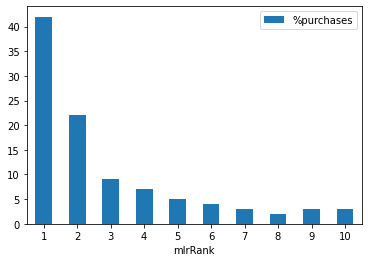

In [128]:
ax = purchase_rank.plot.bar(x='mlrRank', y='%purchases', rot=0)

In [148]:
rank_change_purchase=purchase['mlrRank']-purchase['rank_unbiased']

In [150]:
rank_change_purchase

1172       3.0
3305      -1.0
3872       0.0
3873      -6.0
3924       3.0
          ... 
1926881   -2.0
1926981    0.0
1927022    1.0
1927256   -3.0
1927534    0.0
Length: 2224, dtype: float64

In [149]:
rank_change_purchase.mean()

0.44919064748201437

In [151]:
rank_change_purchase.quantile(0.5)

0.0

In [158]:
rank_change_purchase.quantile(0.75)

1.0

In [159]:
rank_change_purchase.quantile(0.95)

5.0

### Purchase examination of piyi v7 vs v7 unbiased:

In [54]:
pdf_both.head(10)

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7
0,b'0000265fbd7a44aca48a906adeff8875',1,134404248997,-0.483707,0,1.0,1,-0.412333,0,1.0
1,b'0000265fbd7a44aca48a906adeff8875',2,144875276572,-0.992528,0,5.0,2,-1.093016,0,3.0
2,b'0000265fbd7a44aca48a906adeff8875',3,234653614858,-0.812157,1,3.0,3,-1.134505,1,4.0
3,b'0000265fbd7a44aca48a906adeff8875',4,255793472038,-0.780089,0,2.0,4,-1.141674,0,5.0
4,b'0000265fbd7a44aca48a906adeff8875',5,404029139250,-1.391939,0,7.0,5,-1.825263,0,9.0
5,b'0000265fbd7a44aca48a906adeff8875',6,175568244289,-1.158522,0,6.0,6,-1.467183,0,6.0
6,b'0000265fbd7a44aca48a906adeff8875',7,394293977076,-0.905359,0,4.0,7,-0.876004,0,2.0
7,b'0000265fbd7a44aca48a906adeff8875',8,295251065804,-1.878634,0,10.0,8,-2.111445,0,10.0
8,b'0000265fbd7a44aca48a906adeff8875',9,265991957603,-1.501192,0,8.0,9,-1.567383,0,7.0
9,b'0000265fbd7a44aca48a906adeff8875',10,234776254554,-1.798797,1,9.0,10,-1.740605,1,8.0


In [55]:
purchase_both=pdf_both[pdf_both['label_x']==6].copy()

In [56]:
purchase_both['rank_change_purchase']=purchase_both['rank_v7']-purchase_both['rank_unbiased']

In [57]:
purchase_both.shape

(2224, 11)

In [58]:
purchase_both.meid.nunique()

2207

In [60]:
purchase_both[purchase_both['rank_change_purchase']>0].head(10)

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7,rank_change_purchase
2300,b'0052f3046ccf4b2aa061b5479e9ac8cb',9,364093752759,0.222854,6,4.0,9,-0.216227,6,5.0,1.0
12784,b'035670bf6811492aa17657e6449344dd',10,144865306753,-0.577166,6,7.0,10,-0.594763,6,8.0,1.0
19445,b'05264618583546808a02938a7d8ec242',1,325496804406,0.565105,6,1.0,1,0.355706,6,2.0,1.0
30831,b'06d4dc250166461ab1f582114da16c85',3,255423095857,-0.254280,6,4.0,3,-0.413058,6,6.0,2.0
32163,b'070bd5bfda5841bd8b7da66d94d14382',2,225270276620,0.640784,6,1.0,2,0.722844,6,2.0,1.0
32431,b'07167b55081941d292afb81f7ca3614b',4,225363036254,0.209705,6,5.0,4,0.852649,6,6.0,1.0
34229,b'0771ffc89a58433da4c4b2c32e7feaaa',2,302921115889,2.245628,6,1.0,2,2.058161,6,4.0,3.0
35782,b'07c1b64c95614904970e1b265cd05c79',4,295415506594,-0.646258,6,4.0,4,-1.150674,6,6.0,2.0
72275,b'0bf84ebc087a4a9c8f620a87f792878b',7,314099255480,0.174945,6,5.0,7,0.152822,6,6.0,1.0
75604,b'0c536e75a23e474a809ab1d07e9cedb0',4,374294402298,0.256238,6,2.0,4,0.202678,6,4.0,2.0


In [61]:
purchase_both[purchase_both['rank_change_purchase']>0]['rank_change_purchase'].mean()

1.5278592375366569

In [62]:
purchase_both[purchase_both['rank_change_purchase']<0]['rank_change_purchase'].mean()

-1.6470588235294117

In [63]:
purchase_both[purchase_both['rank_change_purchase']!=0]['rank_change_purchase'].mean()

-0.05726872246696035

In [64]:
purchase_both[purchase_both['rank_change_purchase']<0].shape

(340, 11)

In [70]:
341/2224*100

15.33273381294964

In [65]:
purchase_both[purchase_both['rank_change_purchase']>0].shape

(341, 11)

In [66]:
purchase_both[purchase_both['rank_change_purchase']==0].shape

(1543, 11)

In [67]:
purchase_both[purchase_both['rank_change_purchase']!=0].shape

(681, 11)

In [69]:
purchase_both[purchase_both['rank_change_purchase']>0].head(5)

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7,rank_change_purchase
2300,b'0052f3046ccf4b2aa061b5479e9ac8cb',9,364093752759,0.222854,6,4.0,9,-0.216227,6,5.0,1.0
12784,b'035670bf6811492aa17657e6449344dd',10,144865306753,-0.577166,6,7.0,10,-0.594763,6,8.0,1.0
19445,b'05264618583546808a02938a7d8ec242',1,325496804406,0.565105,6,1.0,1,0.355706,6,2.0,1.0
30831,b'06d4dc250166461ab1f582114da16c85',3,255423095857,-0.254280,6,4.0,3,-0.413058,6,6.0,2.0
32163,b'070bd5bfda5841bd8b7da66d94d14382',2,225270276620,0.640784,6,1.0,2,0.722844,6,2.0,1.0


In [72]:
purchase_both[purchase_both['rank_change_purchase']<0].head(10)

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7,rank_change_purchase
2071,b'004b3e10d9c747ac9c83485142e5e4e6',8,144851569767,1.112893,6,7.0,8,1.381339,6,4.0,-3.0
2503,b'005dbd4dcced45988d5dee60c98b6ca2',4,225275701666,0.413807,6,6.0,4,0.789013,6,4.0,-2.0
3925,b'00da5393858a4d1a9aacc235b21fc60f',1,144655948741,0.513425,6,4.0,1,0.983477,6,3.0,-1.0
4403,b'0117022a6d8b4f5b8d8ef2a720796c2b',5,295114008658,-0.884203,6,2.0,5,-1.107602,6,1.0,-1.0
18267,b'04f15ee8a04f4df4a12e4b6dc5a6ef5e',2,394229056821,1.878969,6,2.0,2,2.005716,6,1.0,-1.0
21407,b'057befb246cd47e8bb0737369192d1b1',1,203023662329,0.795258,6,2.0,1,1.524723,6,1.0,-1.0
32282,b'0711f60cea2c4059ab6a1929c12f3ad3',1,115581501326,-0.755983,6,4.0,1,-0.425983,6,2.0,-2.0
32429,b'07167b55081941d292afb81f7ca3614b',2,225363114464,0.469991,6,4.0,2,1.069199,6,3.0,-1.0
32432,b'07167b55081941d292afb81f7ca3614b',5,325505068858,-0.332211,6,10.0,5,0.875097,6,5.0,-5.0
46385,b'09b1552450cb49a5a2f78e7860d251fb',4,385314591488,-0.397012,6,4.0,4,-0.305730,6,2.0,-2.0


In [71]:
purchase_both.rank_unbiased.mean(), pdf[pdf['label']==6].rank_unbiased.mean(), \
purchase_both.rank_v7.mean(),pdf_v7[pdf_v7['label']==6].rank_v7.mean()

(2.414118705035971, 2.414118705035971, 2.3965827338129495, 2.3965827338129495)

In [147]:

pdf_both[pdf_both['meid']==b'c58b1e79dfd943f381d7366c419a319e']

,meid,mlrRank_x,itemId,y_pred,label_x,rank_unbiased,mlrRank_y,y_pred_v7,label_y,rank_v7
1167,b'c58b1e79dfd943f381d7366c419a319e',1,115625126062,-3.062748,0,10.0,1,-1.618979,0,5.0
1168,b'c58b1e79dfd943f381d7366c419a319e',2,234597851086,-2.850310,0,9.0,2,-1.250907,0,4.0
1169,b'c58b1e79dfd943f381d7366c419a319e',3,275611218043,0.089930,0,1.0,3,-1.620644,0,6.0
1170,b'c58b1e79dfd943f381d7366c419a319e',4,403935477783,0.009607,0,2.0,4,-2.366657,0,7.0
1171,b'c58b1e79dfd943f381d7366c419a319e',5,155242359880,-1.154720,0,8.0,5,-3.053674,0,8.0
1172,b'c58b1e79dfd943f381d7366c419a319e',6,165487744403,-0.398481,6,3.0,6,-3.590724,6,9.0
1173,b'c58b1e79dfd943f381d7366c419a319e',7,313533493204,-0.856604,0,5.0,7,-3.594193,0,10.0
1174,b'c58b1e79dfd943f381d7366c419a319e',8,204210306498,-0.697792,0,4.0,8,1.362737,0,1.0
1175,b'c58b1e79dfd943f381d7366c419a319e',9,234389522055,-1.054022,0,7.0,9,-0.121591,0,3.0
1176,b'c58b1e79dfd943f381d7366c419a319e',10,164341603978,-0.880203,0,6.0,10,-0.044056,0,2.0


In [148]:
pdf_v7

pdf_v7[pdf_v7['meid']==b'c58b1e79dfd943f381d7366c419a319e']

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred_v7,label,rank_v7
1082331,b'c58b1e79dfd943f381d7366c419a319e',1,115625126062,-1,-1.618979,0,5.0
1082332,b'c58b1e79dfd943f381d7366c419a319e',2,234597851086,-1,-1.250907,0,4.0
1082333,b'c58b1e79dfd943f381d7366c419a319e',3,275611218043,-1,-1.620644,0,6.0
1082334,b'c58b1e79dfd943f381d7366c419a319e',4,403935477783,-1,-2.366657,0,7.0
1082335,b'c58b1e79dfd943f381d7366c419a319e',5,155242359880,-1,-3.053674,0,8.0
1082336,b'c58b1e79dfd943f381d7366c419a319e',6,165487744403,-1,-3.590724,6,9.0
1082337,b'c58b1e79dfd943f381d7366c419a319e',7,313533493204,-1,-3.594193,0,10.0
1082338,b'c58b1e79dfd943f381d7366c419a319e',8,204210306498,-1,1.362737,0,1.0
1082339,b'c58b1e79dfd943f381d7366c419a319e',9,234389522055,-1,-0.121591,0,3.0
1082340,b'c58b1e79dfd943f381d7366c419a319e',10,164341603978,-1,-0.044056,0,2.0


In [149]:

pdf[pdf['meid']==b'c58b1e79dfd943f381d7366c419a319e']

,meid,mlrRank,itemId,labels.labelClassicBBE,y_pred,label,rank_unbiased,X_test_sample_weight,X_test_sample_weight_eval
1167,b'c58b1e79dfd943f381d7366c419a319e',1,115625126062,-1,-3.062748,0,10.0,3.275656,3.275656
1168,b'c58b1e79dfd943f381d7366c419a319e',2,234597851086,-1,-2.850310,0,9.0,3.275656,3.275656
1169,b'c58b1e79dfd943f381d7366c419a319e',3,275611218043,-1,0.089930,0,1.0,3.275656,3.275656
1170,b'c58b1e79dfd943f381d7366c419a319e',4,403935477783,-1,0.009607,0,2.0,3.275656,3.275656
1171,b'c58b1e79dfd943f381d7366c419a319e',5,155242359880,-1,-1.154720,0,8.0,3.275656,3.275656
1172,b'c58b1e79dfd943f381d7366c419a319e',6,165487744403,-1,-0.398481,6,3.0,3.275656,3.275656
1173,b'c58b1e79dfd943f381d7366c419a319e',7,313533493204,-1,-0.856604,0,5.0,3.275656,3.275656
1174,b'c58b1e79dfd943f381d7366c419a319e',8,204210306498,-1,-0.697792,0,4.0,3.275656,3.275656
1175,b'c58b1e79dfd943f381d7366c419a319e',9,234389522055,-1,-1.054022,0,7.0,3.275656,3.275656
1176,b'c58b1e79dfd943f381d7366c419a319e',10,164341603978,-1,-0.880203,0,6.0,3.275656,3.275656
